## Import libraries

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

import seaborn as sn
import matplotlib.pyplot as plt
import csv

## Data set

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O bbc-text.csv

--2020-03-17 03:27:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.192.80, 2607:f8b0:4026:802::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.192.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘bbc-text.csv’

bbc-text.csv        100%[===================>]   4.82M  --.-KB/s    in 0.02s   

2020-03-17 03:27:42 (240 MB/s) - ‘bbc-text.csv’ saved [5057493/5057493]



In [3]:
sentences = []
labels = []
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print("total stopwords:", len(stopwords))

with open("bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)

total_sentence = len(sentences)
print("total labels:", len(labels))
print("total sentences:", total_sentence)
print("one example:", sentences[0])

total stopwords: 153
total labels: 2225
total sentences: 2225
one example: tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abidin

## Utils

In [0]:
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#0000FF', '#000000', '#FF0000', '#66FF66']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

    plt.xlabel('First principal component')
    plt.ylabel('Second principal component')
    plt.title('Dataset PCA (n_components = 2)')

    plt.show()

## Use tf-idf

In [0]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(sentences)

In [6]:
print(vectorizer.get_feature_names()[2000:2200])
total_feature = len(vectorizer.get_feature_names())
print("total feature:", total_feature)
print(X.shape)
#print(X)
#print(X[0:2])
#print(X[0,89])

['agonising', 'agonisingly', 'agony', 'agoye', 'agrarian', 'agree', 'agreeable', 'agreed', 'agreeing', 'agreement', 'agreements', 'agrees', 'agricultural', 'agriculture', 'agrochemical', 'agroflora', 'aguas', 'aguilera', 'agustin', 'agyemang', 'ah', 'ahead', 'ahern', 'ahhhh', 'ahmed', 'ahold', 'ai', 'aichi', 'aid', 'aidan', 'aide', 'aided', 'aiden', 'aides', 'aiding', 'aids', 'aig', 'ailing', 'ailis', 'aim', 'aimed', 'aiming', 'aimlessly', 'aims', 'ain', 'ainsworth', 'ainum', 'aiport', 'air', 'airasia', 'airbrushes', 'airbus', 'aircraft', 'aired', 'aires', 'airing', 'airline', 'airliner', 'airliners', 'airlines', 'airplane', 'airplanes', 'airplay', 'airport', 'airports', 'airs', 'airtime', 'airway', 'airways', 'airy', 'aishwariya', 'aishwarya', 'aisle', 'aitken', 'aiyar', 'aiyegbeni', 'aizlewood', 'aj', 'ajar', 'ajax', 'ak', 'aka', 'akaev', 'akamai', 'akhmetov', 'akin', 'akira', 'akon', 'akroyd', 'aksoy', 'al', 'alabama', 'aladdin', 'alain', 'alamos', 'alan', 'alarm', 'alarmed', 'alarm

## Transform X into X_list for PCA use

In [0]:
X_list = X.toarray()

In [8]:
print(X_list)
print(X_list[0])

[[0.         0.01983868 0.         ... 0.         0.         0.        ]
 [0.         0.02384706 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.02591978 0.         ... 0.         0.         0.        ]
 [0.         0.01587905 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
[0.         0.01983868 0.         ... 0.         0.         0.        ]


## Clustering by KMeans

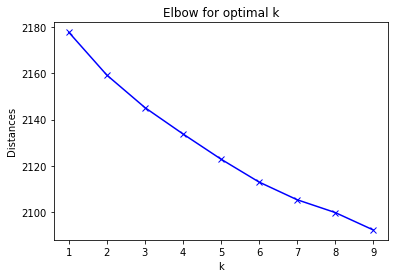

In [0]:
# check for best number of clusters
Distances = []
K = range(1,10)
for k in K:
  km = KMeans(n_clusters = k)
  km = km.fit(X)
  Distances.append(km.inertia_)

plt.plot(K, Distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Distances')
plt.title('Elbow for optimal k')
plt.show()

In [9]:
cluster = 5
model = KMeans(n_clusters=cluster, init='k-means++', max_iter=100, n_init=5) #n_init=1
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
print(model.labels_[:10])
print(np.array(labels)[:10])

[2 3 1 1 0 4 4 1 1 0]
['tech' 'business' 'sport' 'sport' 'entertainment' 'politics' 'politics'
 'sport' 'sport' 'entertainment']


## Plot 2-D diagram by PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(X_list)

X_pca = pca.transform(X_list)

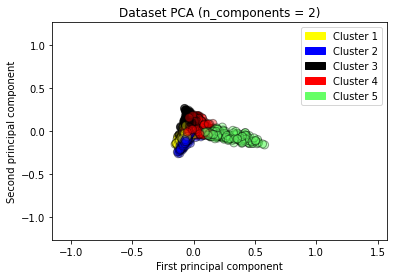

In [12]:
plot_labelled_scatter(X_pca, model.labels_, ['Cluster 1', 'Cluster 2','Cluster 3', 'Cluster 4','Cluster 5'])

## Plot 2-D diagram by t-SNE

In [0]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state = 0)

X_tsne = tsne.fit_transform(X_list)

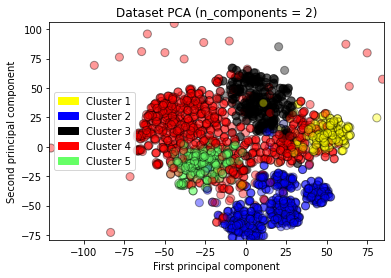

In [14]:
plot_labelled_scatter(X_tsne, model.labels_, ['Cluster 1', 'Cluster 2','Cluster 3', 'Cluster 4','Cluster 5'])

## Check keywords in each cluster

In [0]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

In [16]:
for i in range(cluster):
  print(f"Cluster {i}:")
  for ind in order_centroids[i, :10]:
    print(f"    {terms[ind]}")

Cluster 0:
    film
    best
    awards
    award
    films
    actor
    oscar
    festival
    actress
    director
Cluster 1:
    game
    england
    win
    said
    cup
    match
    team
    players
    injury
    world
Cluster 2:
    people
    mobile
    said
    music
    technology
    users
    digital
    games
    software
    phone
Cluster 3:
    said
    mr
    year
    government
    growth
    economy
    new
    company
    bank
    sales
Cluster 4:
    mr
    labour
    election
    blair
    party
    said
    brown
    howard
    government
    tax


## Test the model

In [17]:
test = vectorizer.transform(["tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr)."])
print(test.shape)
predicted = model.predict(test)
print(predicted)

(1, 29123)
[2]
